In [29]:
import secrets
import string
import random
import math
import json
import datetime
from faker import Faker

"""Generate Data, that mirrors reality as closely as possible"""

fake = Faker()

N = 20
data = {}

def calcBack(num, curr, mini, maxi, phase):
    days = []
    for n in range(num):
        days.append((math.cos(phase+(curr-n)/365*2*math.pi)/2+0.5)*(maxi-mini)+mini+(random.random()*2-1)/20*maxi)
    days.reverse()
    return days
fr = []
for a in range(100):
    sk = 3/7/math.cos(48.55197466741688/180*math.pi)
    countF = min(len(data.items()), random.randint(0,20))
    friends = random.sample(data.keys(), countF)
    uid = ''.join(secrets.choice(string.ascii_lowercase + string.digits) for i in range(N))
    lat, lon = random.randint(20000,60000)/1000, random.randint(-40000,40000)/1000
    if a == 20:
        uid = "11111111111111111111"
        friends = random.sample(data.keys(), 5)
        fr = friends
        lat, lon=48.55197466741688, 12.121412964473935
    days = random.randint(100,400)
    area = random.randint(30,150)
    construction = random.randint(1960, 2020)
    glass = random.randint(1,3)
    heating = random.randint(1,4)
    solar = random.randint(1,10)<=8
    heatpump_type = random.randint(1,4)
    curr = 365-42
    save_solar = [0]*300
    if solar:
        solarArea = area*random.randint(20,70)/100
        save_solar = [0]*300 + calcBack(days, curr, solarArea*math.cos(math.pi*lon/180)*sk*0.5, solarArea*math.cos(math.pi*lon/180)*sk*1.5, math.pi*4/5)
    mult = 1.0 if construction <=1980 else 1
    mult = 0.75 if construction <=2000 else 1
    mult = 0.5 if construction <=2020 else 1

    max_cons = 0.95 *mult*0.9*area
    min_cons = max_cons*0.3
    
    cons_heating = [0]*300 + calcBack(days, curr,min_cons, max_cons, 0)
    #print(cons_heating)
    cons_electricity = [0]*300 + calcBack(days, curr,7, 13,0)
    
    surplus = False
    cons_combined = []
    if heating == 4:
        for a,b in zip(cons_electricity, cons_heating):
            cons_combined.append(a+b)
    else:
        cons_combined = cons_electricity
    
    for a,b in zip(save_solar, cons_combined):
        if a>b*1.2:
            surplus = True
    
    convNumToMonth={
        1:"Jan",
        2:"Feb",
        3:"Mar",
        4:"Apr",
        5:"May",
        6:"Jun",
        7:"Jul",
        8:"Aug",
        9:"Sept",
        10:"Oct",
        11:"Nov",
        12:"Dec",
    }
    
    def numberOfDays(y, m):
      leap = 0
      if y% 400 == 0:
         leap = 1
      elif y % 100 == 0:
         leap = 0
      elif y% 4 == 0:
         leap = 1
      if m==2:
         return 28 + leap
      list = [1,3,5,7,8,10,12]
      if m in list:
         return 31
      return 30
    
    now = datetime.datetime.now()
    year = now.year
    month = now.month
    day = now.day
    lens = [day]
    months = [month]
    for a in range(1,6):
        y= year
        m = month
        if m-a <=0:
            y-= 1
            m = 12+m-a
        else:
            m-=a
        lens.append(numberOfDays(y,m))
        months.append(m)
    months_conv = []
    saved_month = []
    heating_month = []
    electricity_month = []
    ind = 0
    for enum,a in enumerate(lens):
        months_conv.append(convNumToMonth[months[enum]])
        saved_month.append(sum(save_solar[-ind-1-a:-ind-1]))
        heating_month.append(sum(cons_heating[-ind-1-a:-ind-1]))
        electricity_month.append(sum(cons_electricity[-ind-1-a:-ind-1]))
        ind+= a
    months_conv.reverse()
    saved_month.reverse()
    heating_month.reverse()
    electricity_month.reverse()
    _saved_month = []
    _heating_month = []
    _electricity_month = []
    
    for a,b,c,d in zip(months_conv, saved_month, heating_month, electricity_month):
        _saved_month.append([a,b])
        _heating_month.append([a,c])
        _electricity_month.append([a,d])
    
    
    data[uid] = {
        "name": fake.name(),
        "friends": friends,
        "monthly": {
            "saved": _saved_month,
            "heating": _heating_month,
            "electricity": _electricity_month
        },
        "consumption_heating": cons_heating,
        "consumption_electricity": cons_electricity,
        "solar": {
            "installed":solar,
            "save_solar": save_solar,
            "surplus": surplus
            },
        "home":{
            "lat":lat,
            "lon":lon,
            "area": area,
            "glass": "single" if glass == 1 else ("double" if glass == 2 else "triple"),
            "gas_heating": heating == 1,
            "oil_heating": heating == 2,
            "pellet_heating": heating == 3,
            "pump_heating": heating == 4,
            "floor_heating": random.randint(1,2) ==1,
            "yearOfConstruction": construction,
            "pump_type": None if not heating == 4 else ("air" if heatpump_type == 1 else ("air-water" if heatpump_type == 2 else ("earth" if heatpump_type == 3 else "groundwater")))
        }
    }
with open("userData.json", "w") as f:
    json.dump(data,f)



C:\Users\schiw\AppData\Local\Temp\ipykernel_20680\1124323454.py:26: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  friends = random.sample(data.keys(), countF)
C:\Users\schiw\AppData\Local\Temp\ipykernel_20680\1124323454.py:31: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  friends = random.sample(data.keys(), 5)


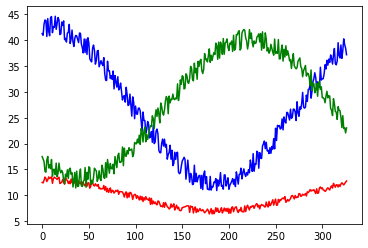

In [30]:
import matplotlib.pyplot as plt
with open("userData.json", "r") as f:
    data = json.load(f)
val = list(data.values())[0]
c,v,b = val["consumption_heating"], val["consumption_electricity"], val["solar"]["save_solar"]
plt.plot(range(len(c)-300),c[300:], color="b")
plt.plot(range(len(c)-300),v[300:], color="r")
if b!= [0]*300:
    plt.plot(range(len(c)-300),b[300:], color="g")